# CAPSTONE PROJECT

In [1]:
# load libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [3]:
# read data file from local hard disk
data = pd.read_csv('C:/users/reshu/Desktop/imarticus project/XYZCorp_LendingData.txt',delimiter='\t', low_memory=False)

## UNDERSTANDING THE DATA

In [4]:
data.shape

(855969, 73)

In [5]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
#To know the datatypes of all the variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null object
pymnt_plan           

In [7]:
data.describe(include=['object'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
count,855969,855969,855969,806526,812908,855969,855969,855969,855969,121812,855969,855936,855969,855969,855969,855969,847107,602998,855919,855969,442
unique,2,7,35,290912,11,6,3,103,2,120335,14,60991,931,51,697,2,97,3,102,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2015,n,,debt_consolidation,Debt consolidation,945xx,CA,Aug-2001,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL,Not Verified
freq,600221,247998,54958,12965,282090,429106,318178,48212,855964,231,505392,398089,9466,125172,6433,442555,467510,534094,701687,855527,252


In [8]:
data.describe(include=['int64'])

,id,member_id,default_ind
count,8.559690e+05,8.559690e+05,855969.000000
mean,3.224073e+07,3.476269e+07,0.054286
std,2.271969e+07,2.399418e+07,0.226581
min,5.473400e+04,7.069900e+04,0.000000
25%,9.067986e+06,1.079273e+07,0.000000
50%,3.431355e+07,3.697532e+07,0.000000
75%,5.446311e+07,5.803559e+07,0.000000
max,6.861687e+07,7.351969e+07,1.000000


In [9]:
data.describe(include=['float64'])

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,213139.000000,855969.0,442.000000,440.000000,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000
mean,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,44.101450,1.0,107412.163982,18.318477,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963
std,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,22.164907,0.0,47987.608637,7.221855,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049
min,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.050000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,27.000000,1.0,75000.250000,13.187500,0.000000,0.000000e+00,2.987000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,44.000000,1.0,100000.000000,17.735000,0.000000,0.000000e+00,8.100850e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24959.500000,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000
75%,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.085700e+

In [10]:
# create a copy of the original data
raw_data=data

In [11]:
# segregate numberical and categorical variables
data_cat_col=[col for col in data.columns if data[col].dtype=='object']
data_cat=data[data_cat_col]
data_num=data.drop(data_cat_col,axis=1)

In [12]:
data_cat['default_ind']=data_num['default_ind']
data_cat['collections_12_mths_ex_med']=data_num['collections_12_mths_ex_med']
data_num.drop(['collections_12_mths_ex_med','default_ind'],axis=1,inplace=True)

In [13]:
# Understanding the target variable
data_cat['default_ind'].value_counts(normalize=True)

0    0.945714
1    0.054286
Name: default_ind, dtype: float64

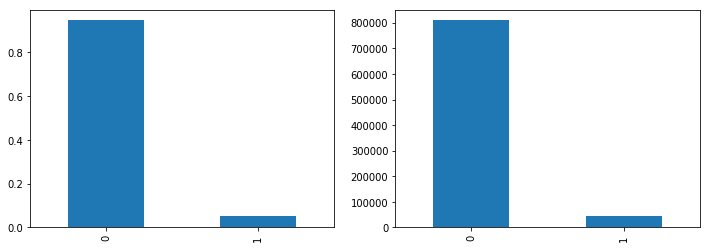

In [14]:
#Visualizing the distribution of the target variable
plt.figure(1,figsize=(12,4))
plt.subplot(121)
data_cat['default_ind'].value_counts(normalize=True).plot.bar()
plt.subplot(122)
data_cat['default_ind'].value_counts(normalize=False).plot.bar()

In [15]:
data_num.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data_cat.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,default_ind,collections_12_mths_ex_med
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,Jan-1985,f,Jan-2015,NaN,Jan-2016,INDIVIDUAL,NaN,0,0.0
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,Apr-1999,f,Apr-2013,NaN,Sep-2013,INDIVIDUAL,NaN,1,0.0
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,Nov-2001,f,Jun-2014,NaN,Jan-2016,INDIVIDUAL,NaN,0,0.0
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,Feb-1996,f,Jan-2015,NaN,Jan-2015,INDIVIDUAL,NaN,0,0.0
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,Jan-1996,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL,NaN,0,0.0


## DEEPER UNDERSTANDING OF THE VARIABLES

In [17]:
# To find the unique value counts for each numerical variable
unique_num=[]
for col in data_num.columns:
    unique_num.append(data_num[col].nunique())
a=pd.DataFrame({"columns":data_num.columns,"unique":(unique_num)})
a=a.sort_values("unique",ascending=False)
a

,columns,unique
0,id,855969
1,member_id,855969
21,total_pymnt_inv,494744
20,total_pymnt,494607
34,tot_cur_bal,322286
23,total_rec_int,317683
19,out_prncp_inv,254328
22,total_rec_prncp,250385
18,out_prncp,236739
27,last_pymnt_amnt,230321


In [18]:
#print variables with unique values<20
c=a[a['unique']<20]
c

,columns,unique
38,open_il_24m,16
47,inq_fi,16
42,open_rv_12m,15
37,open_il_12m,12
35,open_acc_6m,11
10,inq_last_6mths,9
32,acc_now_delinq,8
29,policy_code,1


In [19]:
#print distribution of each levels in each of the numerical variables
for col in c['columns'].values:
    print("\n",col,":","\n",data_num[col].value_counts().sort_values(ascending=False)/data_num[col].value_counts().sum(),"\n")


 open_il_24m : 
 1.0     0.303808
0.0     0.256773
2.0     0.206954
3.0     0.114088
4.0     0.059151
5.0     0.028070
6.0     0.014223
7.0     0.007601
8.0     0.003537
9.0     0.001656
11.0    0.001129
10.0    0.001054
12.0    0.001054
14.0    0.000452
13.0    0.000301
15.0    0.000151
Name: open_il_24m, dtype: float64 


 inq_fi : 
 0.0     0.532511
1.0     0.233519
2.0     0.119657
3.0     0.052905
4.0     0.028447
5.0     0.016331
6.0     0.007149
7.0     0.004741
8.0     0.001881
9.0     0.001204
10.0    0.000602
11.0    0.000452
13.0    0.000226
12.0    0.000226
14.0    0.000075
15.0    0.000075
Name: inq_fi, dtype: float64 


 open_rv_12m : 
 0.0     0.334512
1.0     0.305765
2.0     0.182797
3.0     0.098585
4.0     0.043498
5.0     0.017535
6.0     0.008353
7.0     0.003989
8.0     0.001957
10.0    0.001129
9.0     0.000978
11.0    0.000376
12.0    0.000376
19.0    0.000075
22.0    0.000075
Name: open_rv_12m, dtype: float64 


 open_il_12m : 
 0.0     0.510762
1.0     0.3094

In [20]:
# To find the unique value counts for each categorical variable
unique_cat=[]
for col in data_cat.columns:
    unique_cat.append(data_cat[col].nunique())
b=pd.DataFrame({"columns":data_cat.columns,"unique":(unique_cat)})
b=b.sort_values("unique",ascending=False)
b

,columns,unique
3,emp_title,290912
9,desc,120335
11,title,60991
12,zip_code,931
14,earliest_cr_line,697
7,issue_d,103
18,last_credit_pull_d,102
16,last_pymnt_d,97
13,addr_state,51
2,sub_grade,35


In [21]:
#print variables with unique values<15
d=b[b['unique']<15]
d

,columns,unique
10,purpose,14
22,collections_12_mths_ex_med,12
4,emp_length,11
1,grade,7
5,home_ownership,6
6,verification_status,3
17,next_pymnt_d,3
20,verification_status_joint,3
8,pymnt_plan,2
15,initial_list_status,2


In [22]:
#print distribution of each levels in each of the categorical variables
for col in d['columns'].values:
    print("\n",col,":","\n",data_cat[col].value_counts().sort_values(ascending=False)/data_cat[col].value_counts().sum(),"\n")


 purpose : 
 debt_consolidation    0.590433
credit_card           0.233822
home_improvement      0.058362
other                 0.047839
major_purchase        0.019378
small_business        0.011431
car                   0.010039
medical               0.009572
moving                0.006028
vacation              0.005306
house                 0.004104
wedding               0.002664
renewable_energy      0.000641
educational           0.000381
Name: purpose, dtype: float64 


 collections_12_mths_ex_med : 
 0.0     0.986979
1.0     0.012057
2.0     0.000828
3.0     0.000093
4.0     0.000026
5.0     0.000008
6.0     0.000002
10.0    0.000001
14.0    0.000001
20.0    0.000001
16.0    0.000001
7.0     0.000001
Name: collections_12_mths_ex_med, dtype: float64 


 emp_length : 
 10+ years    0.347013
2 years      0.093474
< 1 year     0.083155
3 years      0.082902
1 year       0.067480
5 years      0.066197
4 years      0.062299
7 years      0.053147
8 years      0.052184
6 years      0.05

In [23]:
#dropping unwanted variables

data_num.drop(["policy_code","member_id","id","acc_now_delinq"],axis=1,inplace=True)
data_cat.drop(["application_type","pymnt_plan"],axis=1,inplace=True)

In [24]:
data_num.shape,data_cat.shape

((855969, 46), (855969, 21))

## DROPPING COLUMNS WITH MISSING VALUES

In [25]:
#calculate missing value percentage in each numerical column
missing_data_num=data_num.isnull().sum().sort_values(ascending=False)
percent=(missing_data_num/data_num.isnull().count()*100).sort_values(ascending=False)
f=pd.concat([missing_data_num,percent],axis=1,keys=['missing count','percent']).sort_values('missing count',ascending=False)
f[f['percent']>50]

,missing count,percent
dti_joint,855529,99.948596
annual_inc_joint,855527,99.948363
il_util,844360,98.643759
mths_since_rcnt_il,843035,98.488964
all_util,842681,98.447607
max_bal_bc,842681,98.447607
total_cu_tl,842681,98.447607
total_bal_il,842681,98.447607
open_rv_24m,842681,98.447607
open_rv_12m,842681,98.447607


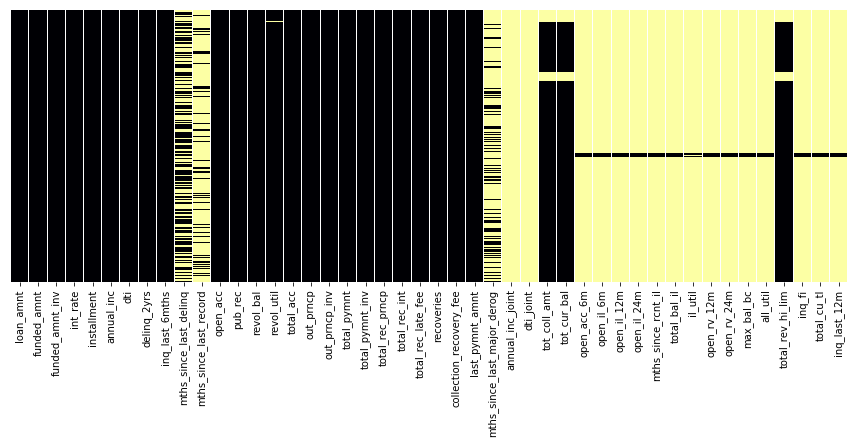

In [26]:
plt.figure(figsize=(15,5))
sns.heatmap(data_num.isnull(), cbar = False, yticklabels=False, cmap="inferno" )

In [27]:
#drop columns with missing values > 50%
data_num.drop(f[f['percent']>50].index.values,axis=1,inplace=True)

In [28]:
#calculate missing value percentage in each categorical column
missing_data_cat=data_cat.isnull().sum().sort_values(ascending=False)
percent=(missing_data_cat/data_cat.isnull().count()*100).sort_values(ascending=False)
g=pd.concat([missing_data_cat,percent],axis=1,keys=['missing count','percent']).sort_values('missing count',ascending=False)
g[g['percent']>50]

,missing count,percent
verification_status_joint,855527,99.948363
desc,734157,85.769111


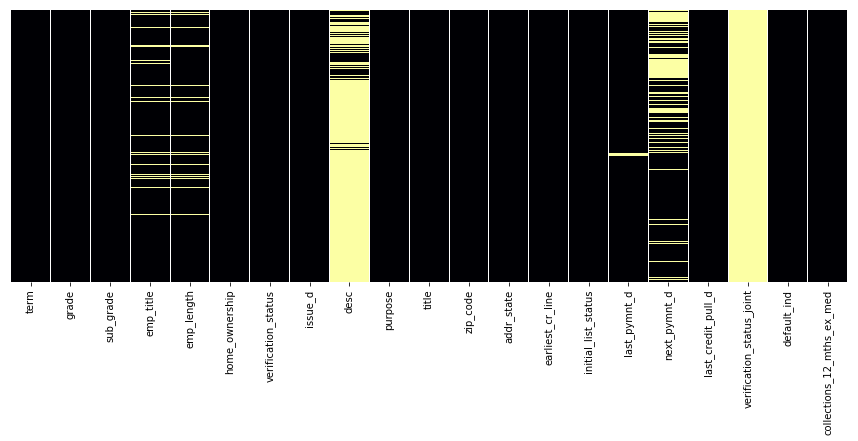

In [29]:
plt.figure(figsize=(15,5))
sns.heatmap(data_cat.isnull(), cbar = False, yticklabels=False, cmap="inferno" )

In [30]:
#drop columns with missing values > 50%
data_cat.drop(g[g['percent']>50].index.values,axis=1,inplace=True)

In [31]:
data_num.shape,data_cat.shape

((855969, 27), (855969, 19))

## OUTLIER TREATMENT

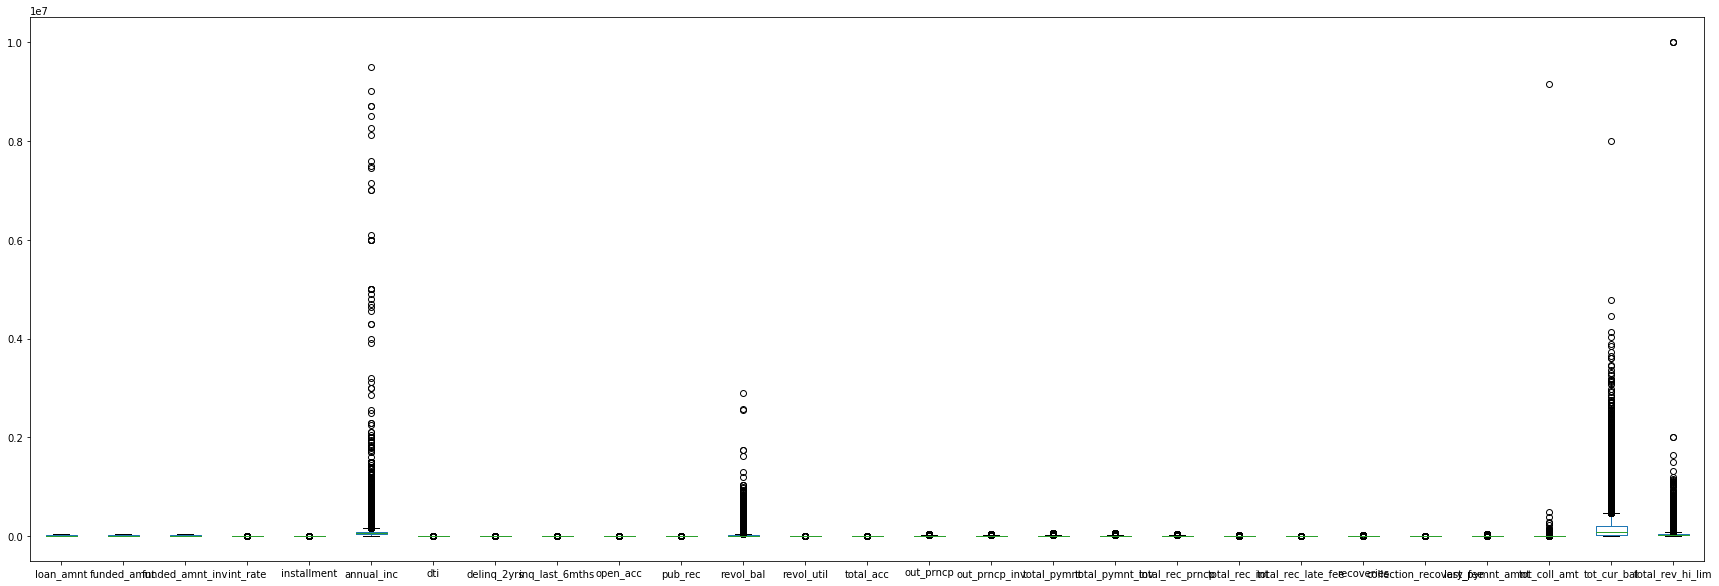

In [32]:
# plot the distribution of all numerical variables
data_num.plot.box(figsize=(30,10))

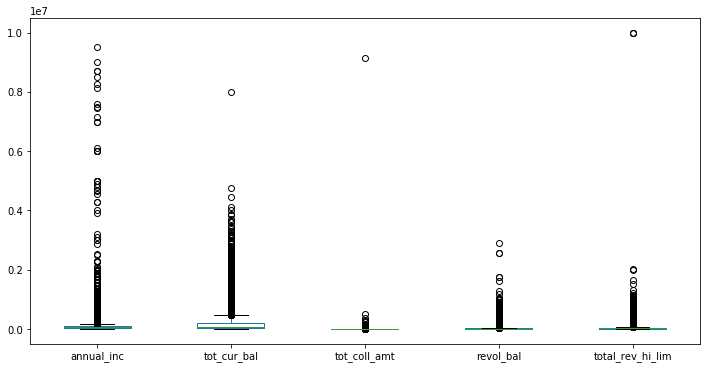

In [33]:
# plot the distribution of the numerical variables with extreme outliers
data_num[['annual_inc','tot_cur_bal','tot_coll_amt','revol_bal','total_rev_hi_lim']].plot.box(figsize=(12,6))

### FILLING WITH 99 PERCENTILE VALUES

In [34]:
x=data_num['tot_coll_amt'].quantile([0.99]).values
data_num['tot_coll_amt'][data_num['tot_coll_amt']>500000]=x[0]

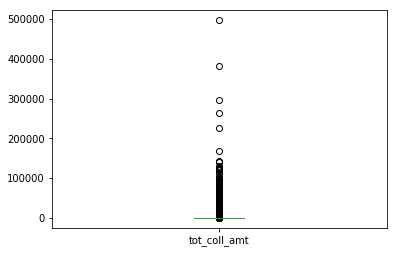

In [35]:
data_num['tot_coll_amt'].plot.box()

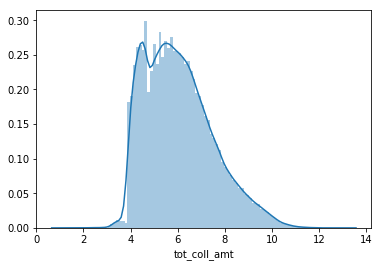

In [36]:
sns.distplot(np.log1p(data_num['tot_coll_amt'][data_num['tot_coll_amt']>0]),bins=100)

In [37]:
x=data_num['total_rev_hi_lim'].quantile([0.99]).values
data_num['total_rev_hi_lim'][data_num['total_rev_hi_lim']>1500000]=x[0]

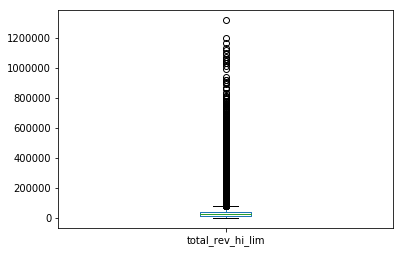

In [38]:
data_num['total_rev_hi_lim'].plot.box()

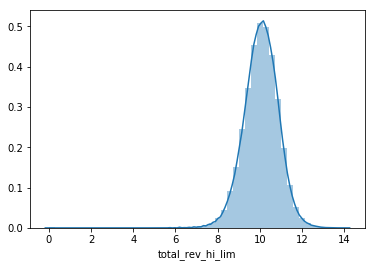

In [39]:
sns.distplot(np.log1p(data_num['total_rev_hi_lim']),bins=50)

In [40]:
x=data_num['tot_cur_bal'].quantile([0.99]).values
data_num['tot_cur_bal'][data_num['tot_cur_bal']>5000000]=x[0]

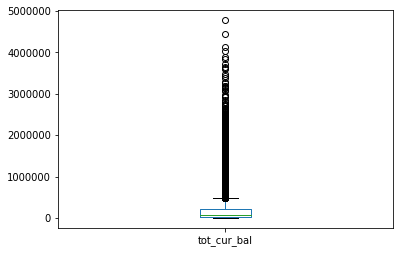

In [41]:
data_num['tot_cur_bal'].plot.box()

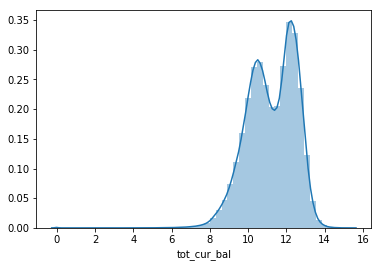

In [42]:
sns.distplot(np.log1p(data_num['tot_cur_bal']),bins=50)

## REDUCING SKEWNESS OF VARIABLES

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002693A56E1D0>,
      dtype=object)

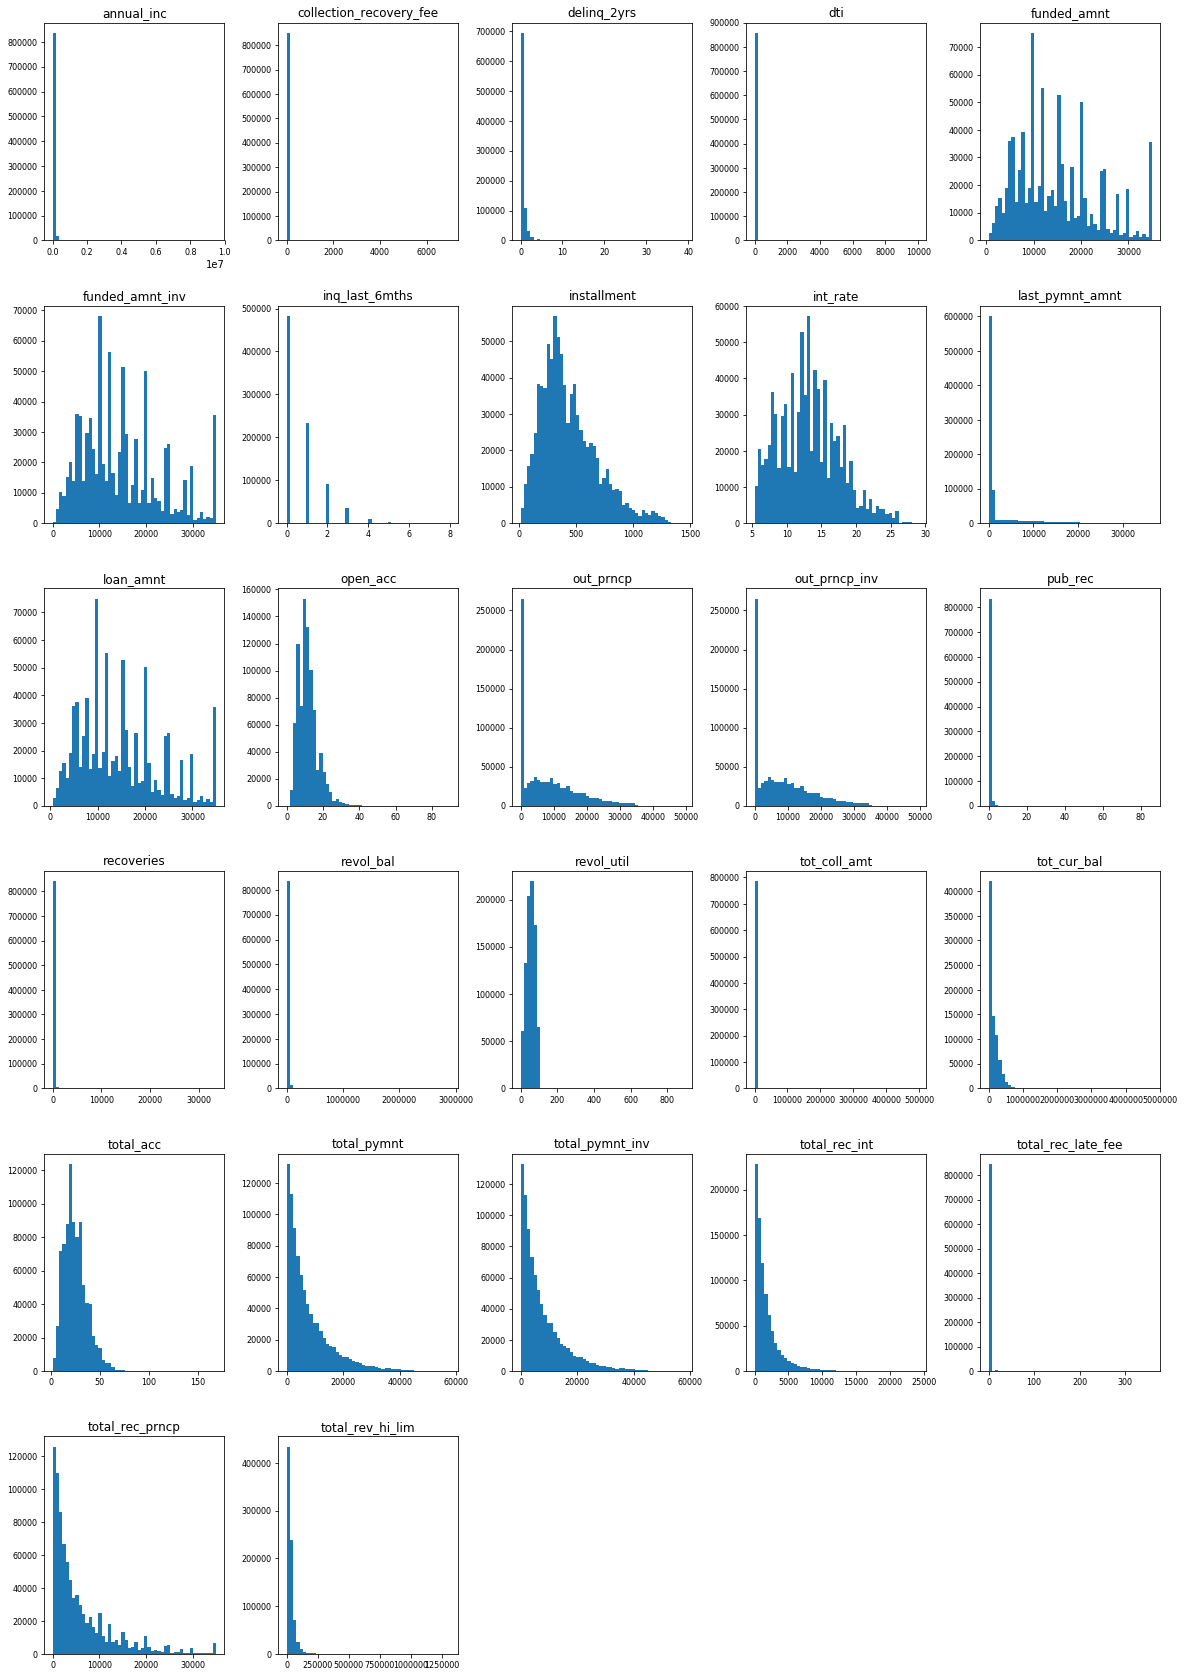

In [43]:
#Visulaize the distribution of all numerical variables
data_num.hist(figsize=(20,30),bins=50,xlabelsize=8,ylabelsize=8,grid=False)

In [44]:
#Measure skewness of all variables
from scipy.stats import skew
data_num_skew = data_num.apply(lambda x: skew(x.dropna()))
data_num_skew[data_num_skew > .75]

installment                  0.937837
annual_inc                  43.612564
dti                        439.572644
delinq_2yrs                  5.499226
inq_last_6mths               1.683919
open_acc                     1.246913
pub_rec                     13.550764
revol_bal                   16.214391
total_acc                    0.891213
out_prncp                    0.943730
out_prncp_inv                0.943586
total_pymnt                  1.779937
total_pymnt_inv              1.783566
total_rec_prncp              1.914786
total_rec_int                2.832147
total_rec_late_fee          19.233446
recoveries                  17.604535
collection_recovery_fee     28.670142
last_pymnt_amnt              3.408707
tot_coll_amt                57.874210
tot_cur_bal                  2.760035
total_rev_hi_lim             5.662839
dtype: float64

In [45]:
#Using log transformation to normalise the variables
change=['tot_coll_amt','total_rev_hi_lim','tot_cur_bal','installment','dti','annual_inc']
data_num[change] = np.log1p(data_num[change])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002694224F550>,
      dtype=object)

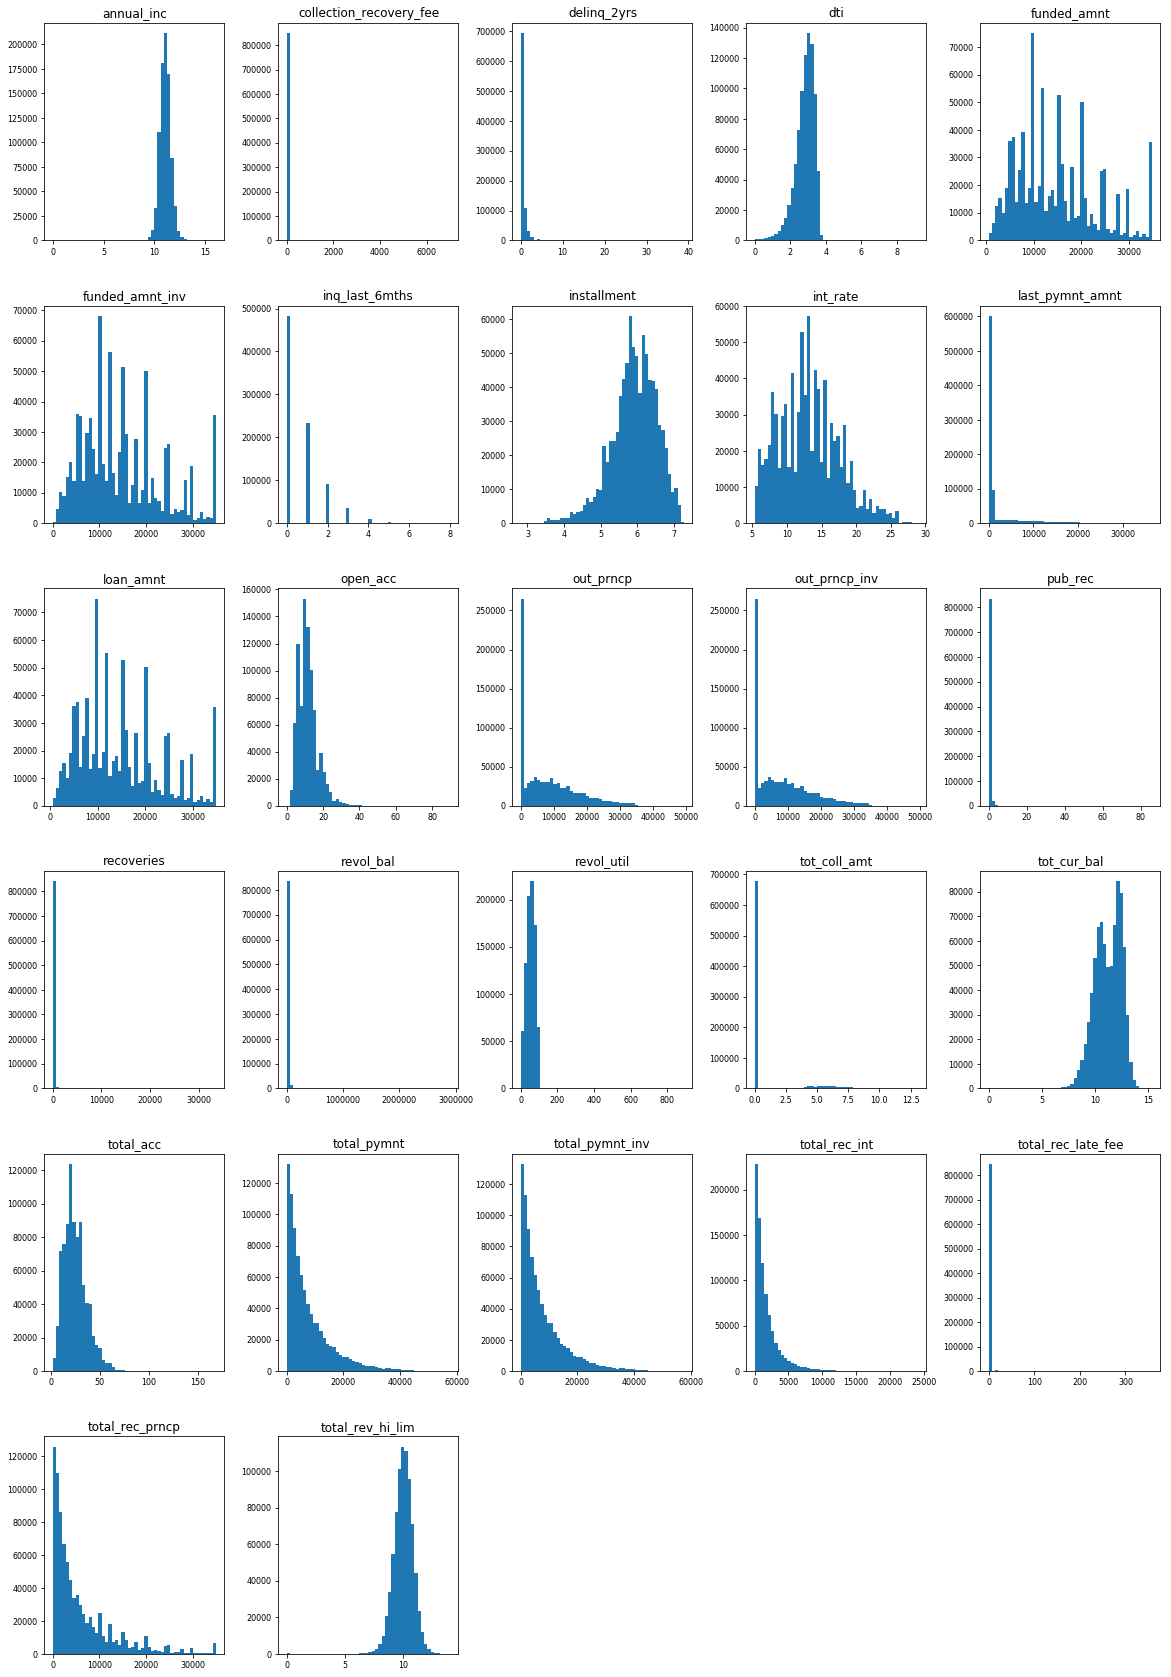

In [46]:
data_num.hist(figsize=(20,30),bins=50,xlabelsize=8,ylabelsize=8,grid=False)

## MISSING VALUES TREATMENT

In [47]:
# Print missing values in numerical variables
a=data_num.isnull().sum().sort_values(ascending=False)[data_num.isnull().sum().sort_values(ascending=False)>0]
a

total_rev_hi_lim    67313
tot_coll_amt        67313
tot_cur_bal         67313
revol_util            446
dtype: int64

In [48]:
# Find the difference between mean and median of numerical variables
for i in a.index.values:
    print(i,data_num[i].mean()-data_num[i].median(),"\t")

total_rev_hi_lim -0.02300347339218689 	
tot_coll_amt 0.8542951553149138 	
tot_cur_bal -0.08555830962158062 	
revol_util -0.880595495384803 	


In [49]:
# Fill na values with mean 
for i in a.index.values:
    data_num[i].fillna(data_num[i].mean(),inplace=True)

### STANDARDIZE ALL NUMERICAL VARIABLES

In [50]:
# Standardise each numerical variable with mean, max and min values
data_num = ((data_num - data_num.mean())/(data_num.max() - data_num.min()))

In [51]:
# Print missing values in categorical variables
b=data_cat.isnull().sum().sort_values(ascending=False)[data_cat.isnull().sum().sort_values(ascending=False)>0]
b

next_pymnt_d                  252971
emp_title                      49443
emp_length                     43061
last_pymnt_d                    8862
collections_12_mths_ex_med        56
last_credit_pull_d                50
title                             33
dtype: int64

In [52]:
data_cat[b.index.values].nunique()

next_pymnt_d                       3
emp_title                     290912
emp_length                        11
last_pymnt_d                      97
collections_12_mths_ex_med        12
last_credit_pull_d               102
title                          60991
dtype: int64

In [53]:
for i in b.index.values:
    print(i, "\n",data_cat[i].value_counts().sort_values(ascending=False).head(5))

next_pymnt_d 
 Feb-2016    534094
Jan-2016     68838
Mar-2016        66
Name: next_pymnt_d, dtype: int64
emp_title 
 Teacher             12965
Manager             10821
Registered Nurse     5341
RN                   5182
Owner                5157
Name: emp_title, dtype: int64
emp_length 
 10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
Name: emp_length, dtype: int64
last_pymnt_d 
 Jan-2016    467510
Dec-2015    142783
Jul-2015     14472
Aug-2015     13010
Oct-2015     12503
Name: last_pymnt_d, dtype: int64
collections_12_mths_ex_med 
 0.0    844768
1.0     10320
2.0       709
3.0        80
4.0        22
Name: collections_12_mths_ex_med, dtype: int64
last_credit_pull_d 
 Jan-2016    701687
Dec-2015     19039
Nov-2015     11388
Oct-2015     10290
Sep-2015      9985
Name: last_credit_pull_d, dtype: int64
title 
 Debt consolidation         398089
Credit card refinancing    159228
Home improvement            38633
Other                    

In [54]:
# Fill na values with mode 
to_fill=['collections_12_mths_ex_med','emp_length',]
for i in to_fill:
    data_cat[i].fillna(data_cat[i].mode()[0],inplace=True)

### DROPPING IRRELEVANT VARIABLES

In [55]:
data_cat.drop(['title','emp_title','next_pymnt_d','grade','last_credit_pull_d','earliest_cr_line','last_pymnt_d','zip_code'],axis=1,inplace=True)

In [56]:
data_num.shape,data_cat.shape

((855969, 27), (855969, 11))

In [59]:
# data_num.to_csv('C:/users/reshu/Desktop/imarticus project/data_num.csv',index=False)
# data_cat.to_csv('C:/users/reshu/Desktop/imarticus project/data_cat.csv',index=False)

In [60]:
# data_num=pd.read_csv('C:/users/reshu/Desktop/imarticus project/data_num.csv')
# data_cat=pd.read_csv('C:/users/reshu/Desktop/imarticus project/data_cat.csv')

## DATA VISUALIZATION

### VISUALIZING CATEGORICAL VARIABLES

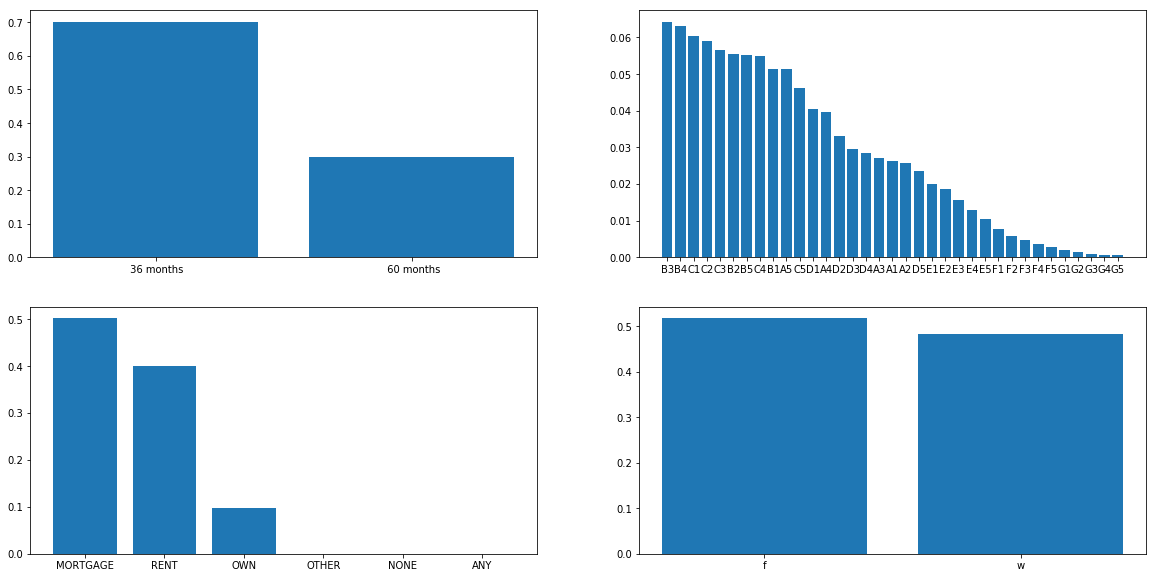

In [61]:
fig, ax=plt.subplots(2,2,figsize=(20,10))
ax[0,0].bar(data_cat['term'].value_counts().index,data_cat['term'].value_counts(normalize=True))
ax[0,1].bar(data_cat['sub_grade'].value_counts().index,data_cat['sub_grade'].value_counts(normalize=True))
ax[1,0].bar(data_cat['home_ownership'].value_counts().index,data_cat['home_ownership'].value_counts(normalize=True))
ax[1,1].bar(data_cat['initial_list_status'].value_counts().index,data_cat['initial_list_status'].value_counts(normalize=True))
plt.draw()

[Text(0, 0, 'debt_consolidation'),
 Text(1, 0, 'credit_card'),
 Text(2, 0, 'home_improvement'),
 Text(3, 0, 'other'),
 Text(4, 0, 'major_purchase'),
 Text(5, 0, 'small_business'),
 Text(6, 0, 'car'),
 Text(7, 0, 'medical'),
 Text(8, 0, 'moving'),
 Text(9, 0, 'vacation'),
 Text(10, 0, 'house'),
 Text(11, 0, 'wedding'),
 Text(12, 0, 'renewable_energy'),
 Text(13, 0, 'educational')]

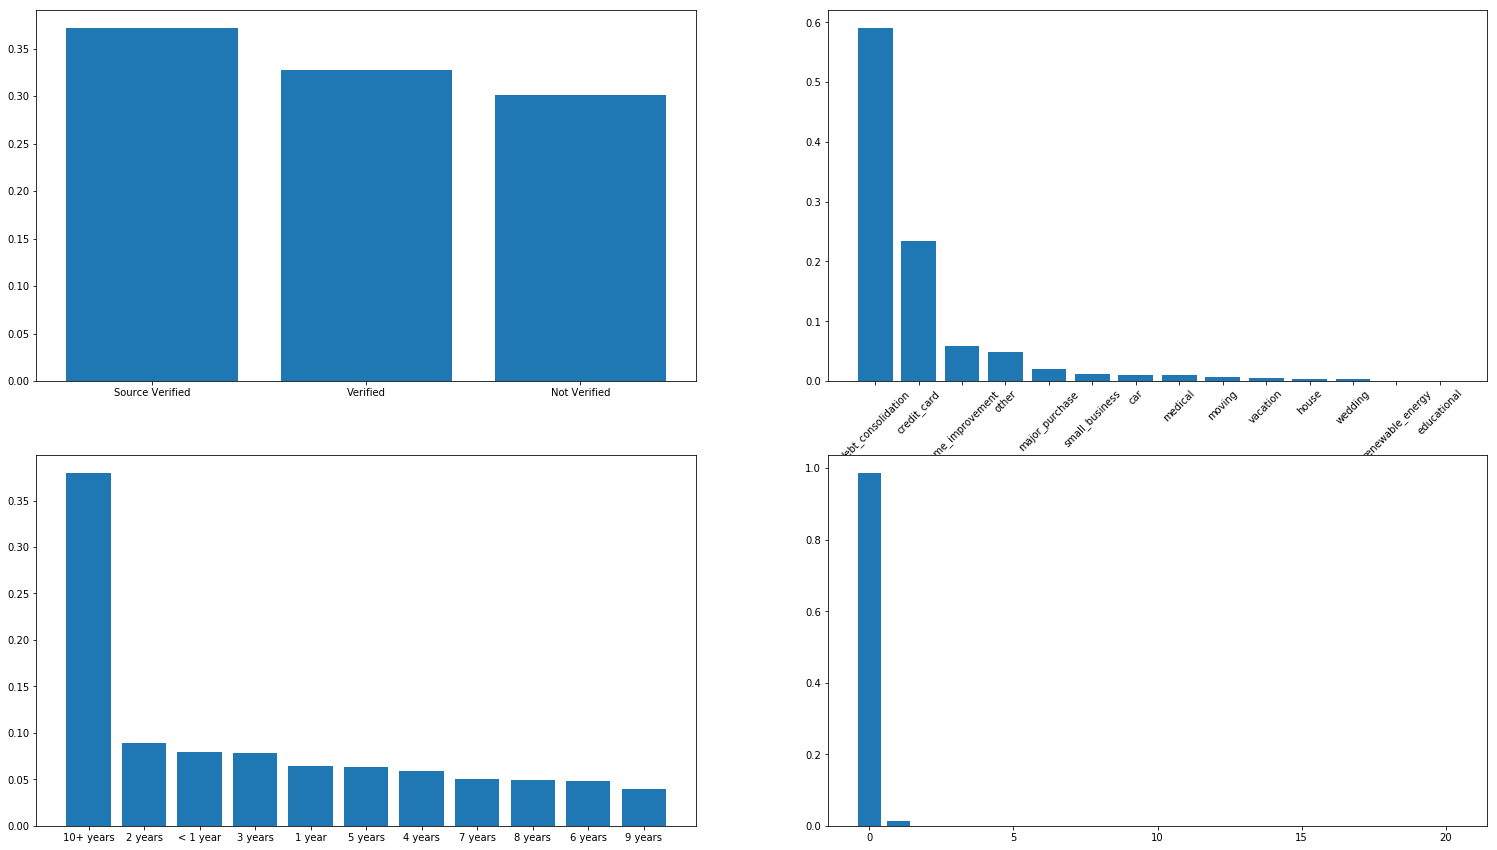

In [62]:
fig, ax=plt.subplots(2,2,figsize=(26,15))
ax[0,0].bar(data_cat['verification_status'].value_counts().index,data_cat['verification_status'].value_counts(normalize=True))
ax[0,1].bar(data_cat['purpose'].value_counts().index,data_cat['purpose'].value_counts(normalize=True))
ax[1,0].bar(data_cat['emp_length'].value_counts().index,data_cat['emp_length'].value_counts(normalize=True))
ax[1,1].bar(data_cat['collections_12_mths_ex_med'].value_counts().index,data_cat['collections_12_mths_ex_med'].value_counts(normalize=True))
plt.draw()
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)


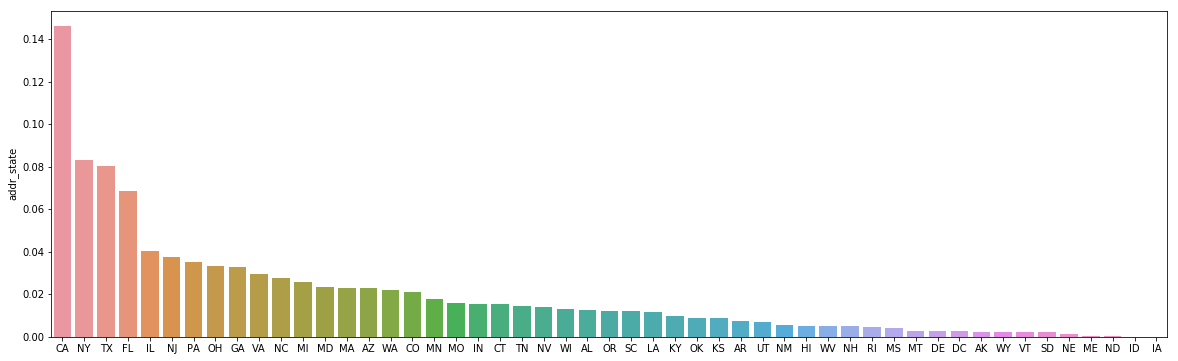

In [63]:
# Visualizing using state address
plt.figure(figsize=(20,6))
sns.barplot(data_cat['addr_state'].value_counts().index,data_cat['addr_state'].value_counts(normalize=True))

### VISUALIZING NUMERICAL VARIABLES

Text(0.5, 1.0, 'Funded Amount Distribution')

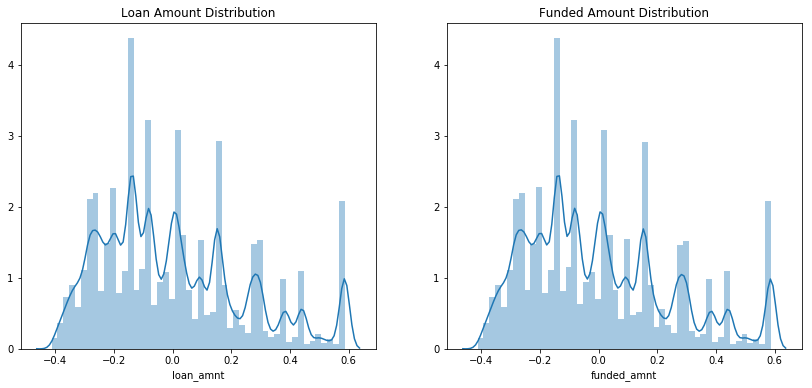

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))


sns.distplot(data_num['loan_amnt'], ax=ax[0])
ax[0].set_title("Loan Amount Distribution")

sns.distplot(data_num['funded_amnt'], ax=ax[1])
ax[1].set_title("Funded Amount Distribution")

Text(0.5, 1.0, 'Interest Rates Distribution')

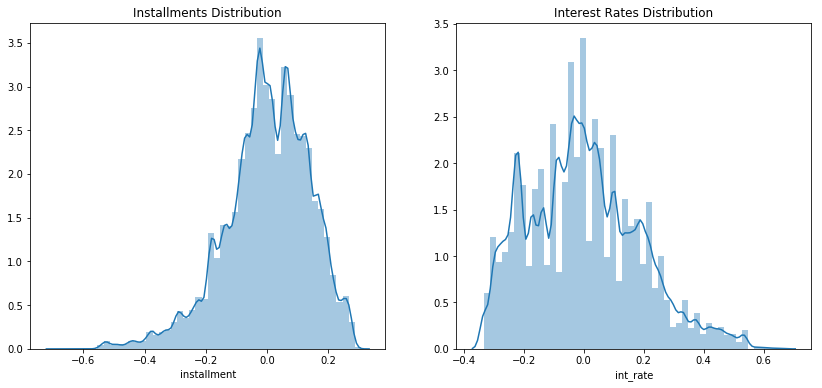

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))


sns.distplot(data_num['installment'], ax=ax[0])
ax[0].set_title("Installments Distribution")

sns.distplot(data_num['int_rate'], ax=ax[1])
ax[1].set_title("Interest Rates Distribution")

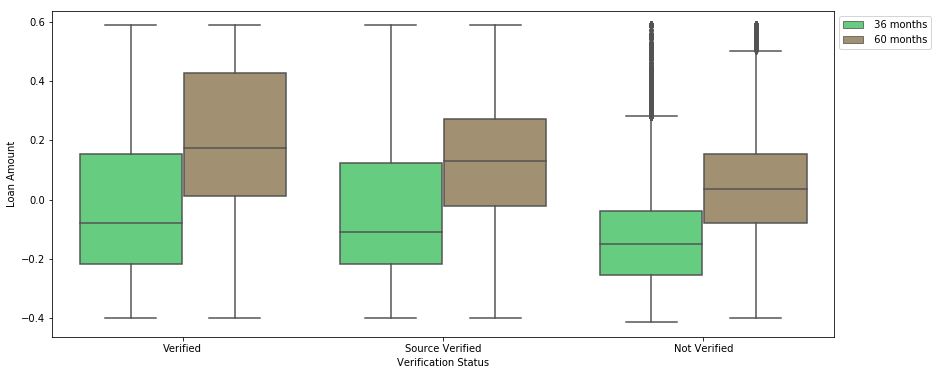

In [66]:
# Loan amount based on Verification status and term
plt.figure(figsize=(14,6))

sns.boxplot(x=data_cat['verification_status'], y=data_num['loan_amnt'], hue=data_cat['term'], palette="terrain")

plt.xlabel("Verification Status")
plt.ylabel("Loan Amount")

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)

In [67]:
# split issued date into month and year
def getMonth(x):
    return x.split('-')[0]


def getYear(x):
    return x.split('-')[1]


data_cat['Month'] = data_cat['issue_d'].apply(getMonth)
data_cat['Year'] = data_cat['issue_d'].apply(getYear)

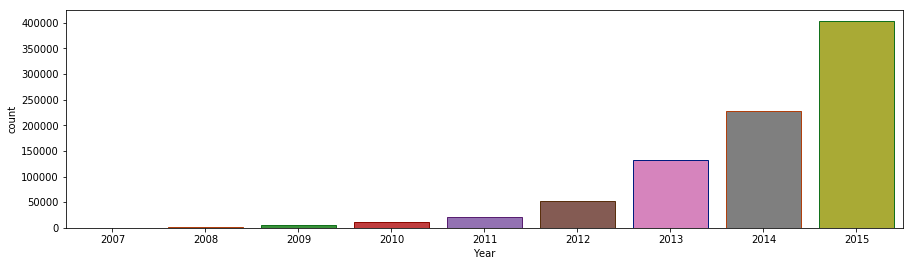

In [68]:
# Visualize by loan issued years
plt.figure(figsize=(15, 4))

sns.countplot(x="Year", data=data_cat, edgecolor=sns.color_palette("dark", 6))

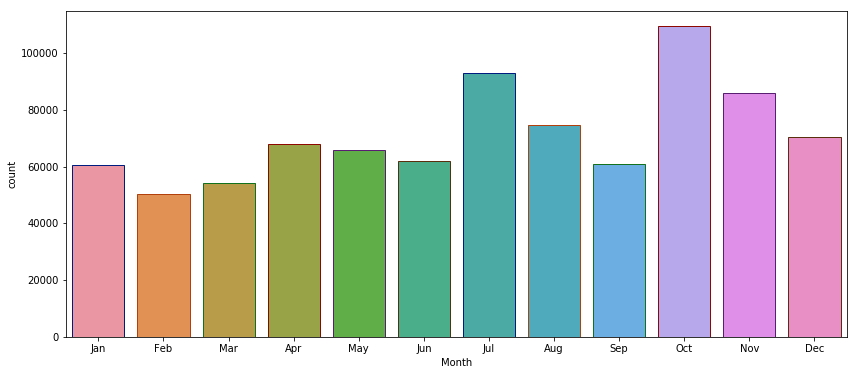

In [69]:
# Visualize by loan issued months
orderby = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(14, 6))

sns.countplot(x="Month", data=data_cat, edgecolor=sns.color_palette("dark", 6), order=orderby)

### LABEL ENCODING OF CATEGORICAL VARIABLES

In [70]:
data_cat['emp_length'] = data_cat['emp_length'].map({'< 1 year':0, '1 year':1, '2 years':2, 
                                                 '3 years':3, '4 years':4, '5 years':5, 
                                                 '6 years':6, '7 years':7, '8 years':8,
                                                 '9 years':9, '10+ years':10})

data_cat['term'] = data_cat['term'].replace({'36 months':1,'60 months':2},regex = True)



In [71]:
data_cat['Month']=data_cat['Month'].map({'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06',
                                              'Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'})

In [72]:
# Create new object to use it as index for splitting data
Period=data_cat['Year'].astype(str)+data_cat['Month'].astype(str)

### ONE HOT ENCODING OF CATEGORICAL VARIABLES

In [73]:
new=['sub_grade','addr_state','initial_list_status','verification_status','home_ownership','purpose']
dummies=pd.concat([pd.get_dummies(data_cat[col]) for col in new], axis=1)
dummies.head()

,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,f,w,Not Verified,Source Verified,Verified,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [74]:
# Drop irrelevant variables
data_cat.drop(['Month','Year','issue_d','sub_grade','addr_state','initial_list_status','verification_status','home_ownership','purpose'],axis=1,inplace=True)

In [75]:
#combining all columns into a new dataframe
new_data=pd.concat([data_num,data_cat,dummies,Period],axis=1)

In [76]:
#rename the period column
new_data.rename(columns={ new_data.columns[-1]: "Period" }, inplace = True)

In [77]:
new_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term,emp_length,default_ind,collections_12_mths_ex_med,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,f,w,Not Verified,Source Verified,Verified,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Period
0,-0.282480,-0.282098,-0.277859,-0.107407,-0.182185,-0.061630,0.056949,-0.00799,0.039886,-0.094916,-0.002262,-0.001123,0.032142,-0.097421,-0.167801,-0.167733,-0.031019,-0.030988,-0.024310,-0.036933,-0.000891,-0.001405,-0.000707,-0.056322,7.245934e-15,2.884283e-13,1.660456e-13,1,10,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,201112
1,-0.354944,-0.354562,-0.348573,0.087777,-0.404277,-0.047742,-0.232074,-0.00799,0.539886,-0.094916,-0.002262,-0.005241,-0.051126,-0.127361,-0.167801,-0.167733,-0.115003,-0.114465,-0.154125,-0.054528,-0.000891,0.002088,-0.000549,-0.057746,7.245934e-15,2.884283e-13,1.660456e-13,2,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,201112
2,-0.357843,-0.357460,-0.351430,0.116928,-0.328428,-0.103475,-0.060415,-0.00799,0.164886,-0.106027,-0.002262,-0.004804,0.048729,-0.091433,-0.167801,-0.167733,-0.080475,-0.079937,-0.098595,-0.047567,-0.000891,-0.001405,-0.000707,-0.043209,7.245934e-15,2.884283e-13,1.660456e-13,1,10,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,201112
3,-0.137553,-0.137170,-0.134287,0.012576,-0.018408,-0.016953,0.023223,-0.00799,0.039886,-0.017138,-0.002262,-0.003894,-0.038126,0.070244,-0.167801,-0.167733,0.079148,0.079686,0.118547,0.018768,0.046422,-0.001405,-0.000707,-0.051226,7.245934e-15,2.884283e-13,1.660456e-13,1,10,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,201112
4,-0.340451,-0.340069,-0.334287,-0.021222,-0.376717,0.013304,0.012013,-0.00799,-0.085114,0.038417,-0.002262,0.003743,-0.001255,0.076232,-0.152268,-0.152200,-0.076347,-0.075809,-0.103364,-0.030818,-0.000891,-0.001405,-0.000707,-0.059168,7.245934e-15,2.884283e-13,1.660456e-13,2,1,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,201112


In [78]:
new_data.shape

(855969, 143)

### SETTING PERIOD AS THE NEW INDEX

In [79]:
new_data=new_data.set_index('Period')
new_data_sorted=new_data.sort_values('Period',ascending=True)
new_data_sorted.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term,emp_length,default_ind,collections_12_mths_ex_med,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,f,w,Not Verified,Source Verified,Verified,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
Period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200706,-0.210017,-0.209634,-0.397145,0.023561,-0.081832,-0.067045,-0.011230,0.017651,-0.085114,-0.050472,-0.002262,-0.004384,-0.003944,-0.103409,-0.167801,-0.167733,0.026683,-0.114951,0.047119,-0.002481,-0.000891,-0.001405,-0.000707,-0.053992,7.245934e-15,2.884283e-13,1.660456e-13,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
200707,-0.282480,-0.282098,-0.301430,-0.243444,-0.192670,0.052428,-0.307332,-0.007990,-0.085114,-0.106027,-0.002262,-0.003738,-0.039807,-0.037541,-0.167801,-0.167733,-0.042908,-0.057594,-0.024310,-0.065310,-0.000891,-0.001405,-0.000707,0.059533,7.245934e-15,2.884283e-13,1.660456e-13,1,8,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
200707,-0.260741,-0.260359,-0.315002,-0.243444,-0.161531,0.041080,-0.281381,-0.007990,-0.085114,-0.017138,-0.002262,-0.004852,-0.050229,-0.055505,-0.167801,-0.167733,-0.021320,-0.060889,-0.002881,-0.044764,-0.000891,-0.001405,-0.000707,-0.060897,7.245934e-15,2.884283e-13,1.660456e-13,1,10,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
200707,-0.282480,-0.282098,-0.306430,-0.243444,-0.192670,-0.029837,-0.169775,-0.007990,0.164886,-0.083805,-0.002262,-0.004940,-0.045970,-0.109397,-0.167801,-0.167733,-0.035652,-0.054960,-0.024310,-0.047991,-0.000891,-0.001405,-0.000707,-0.056677,7.245934e-15,2.884283e-13,1.660456e-13,1,6,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
200707,-0.392625,-0.392243,-0.420002,-0.069806,-0.494889,-0.072977,-0.186613,-0.007990,0.164886,-0.094916,-0.002262,-0.005425,0.023289,-0.127361,-0.167801,-0.167733,-0.107791,-0.131923,-0.132881,-0.063195,-0.000891,-0.001405,-0.000707,-0.059945,7.245934e-15,2.884283e-13,1.660456e-13,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## SPLIT DATA INTO TRAIN AND TEST

In [80]:
train=new_data_sorted.loc['200706':'201505',:]

In [81]:
test=new_data_sorted.loc['201506':,:]

In [82]:
train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term,emp_length,default_ind,collections_12_mths_ex_med,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,f,w,Not Verified,Source Verified,Verified,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
Period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200706,-0.210017,-0.209634,-0.397145,0.023561,-0.081832,-0.067045,-0.011230,0.017651,-0.085114,-0.050472,-0.002262,-0.004384,-0.003944,-0.103409,-0.167801,-0.167733,0.026683,-0.114951,0.047119,-0.002481,-0.000891,-0.001405,-0.000707,-0.053992,7.245934e-15,2.884283e-13,1.660456e-13,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
200707,-0.282480,-0.282098,-0.301430,-0.243444,-0.192670,0.052428,-0.307332,-0.007990,-0.085114,-0.106027,-0.002262,-0.003738,-0.039807,-0.037541,-0.167801,-0.167733,-0.042908,-0.057594,-0.024310,-0.065310,-0.000891,-0.001405,-0.000707,0.059533,7.245934e-15,2.884283e-13,1.660456e-13,1,8,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
200707,-0.260741,-0.260359,-0.315002,-0.243444,-0.161531,0.041080,-0.281381,-0.007990,-0.085114,-0.017138,-0.002262,-0.004852,-0.050229,-0.055505,-0.167801,-0.167733,-0.021320,-0.060889,-0.002881,-0.044764,-0.000891,-0.001405,-0.000707,-0.060897,7.245934e-15,2.884283e-13,1.660456e-13,1,10,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
200707,-0.282480,-0.282098,-0.306430,-0.243444,-0.192670,-0.029837,-0.169775,-0.007990,0.164886,-0.083805,-0.002262,-0.004940,-0.045970,-0.109397,-0.167801,-0.167733,-0.035652,-0.054960,-0.024310,-0.047991,-0.000891,-0.001405,-0.000707,-0.056677,7.245934e-15,2.884283e-13,1.660456e-13,1,6,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
200707,-0.392625,-0.392243,-0.420002,-0.069806,-0.494889,-0.072977,-0.186613,-0.007990,0.164886,-0.094916,-0.002262,-0.005425,0.023289,-0.127361,-0.167801,-0.167733,-0.107791,-0.131923,-0.132881,-0.063195,-0.000891,-0.001405,-0.000707,-0.059945,7.245934e-15,2.884283e-13,1.660456e-13,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term,emp_length,default_ind,collections_12_mths_ex_med,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,f,w,Not Verified,Source Verified,Verified,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
Period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201506,0.587085,0.587467,0.579998,-0.169933,0.247912,0.043522,0.052856,-0.007990,-0.085114,0.149528,-0.002262,0.009961,0.011185,0.112160,0.418025,0.418094,0.002410,0.002948,0.006435,-0.001592,-0.000891,-0.001405,-0.000707,-0.030437,-0.065136,0.072650,0.078705,1,1,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
201506,-0.094075,-0.093692,-0.092145,-0.169933,-0.096038,0.008451,0.040446,-0.007990,-0.085114,-0.050472,-0.002262,0.001229,0.006815,-0.085445,0.046317,0.045920,-0.107673,-0.107189,-0.140642,-0.051691,-0.000891,-0.001405,-0.000707,-0.054456,-0.065136,-0.017519,0.025896,2,10,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
201506,-0.079582,-0.079199,-0.077145,0.102141,-0.053998,-0.018490,0.070304,-0.007990,0.039886,-0.028249,-0.002262,-0.000567,0.022168,-0.013588,0.058520,0.058588,-0.102595,-0.102057,-0.143570,-0.035335,-0.000891,-0.001405,-0.000707,-0.053094,-0.065136,-0.013019,-0.009308,2,2,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
201506,0.587085,0.587467,0.579998,-0.038121,0.258033,0.039056,0.033947,0.068933,-0.085114,-0.017138,-0.002262,0.003817,0.024522,0.058268,0.422821,0.422890,0.008892,0.009429,-0.000330,0.023660,-0.000891,-0.001405,-0.000707,-0.029023,-0.065136,0.085535,0.031788,1,3,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
201506,0.355201,0.355583,0.351427,-0.211758,0.089505,0.027192,0.016450,-0.007990,-0.085114,0.049528,-0.002262,0.003985,0.006702,0.082220,0.326130,0.326198,-0.066275,-0.065738,-0.092504,-0.022482,-0.000891,-0.001405,-0.000707,-0.045954,-0.065136,0.067400,0.049473,2,10,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
train.shape,test.shape

((598978, 142), (256991, 142))

In [85]:
# train.to_csv('C:/users/reshu/Desktop/imarticus project/train.csv',index=False)
# test.to_csv('C:/users/reshu/Desktop/imarticus project/test.csv',index=False)

In [86]:
# train=pd.read_csv('C:/users/ashwin/Desktop/py project/train.csv')
# test=pd.read_csv('C:/users/ashwin/Desktop/py project/test.csv')

## LOGISTIC REGRESSION

In [87]:
X_train=train.drop('default_ind',axis=1)
Y_train=train['default_ind']
X_test=test.drop('default_ind',axis=1)
Y_test=test['default_ind']

In [88]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

In [89]:
#Model fitting and measuring accuracy
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
accuracy_score=accuracy_score(Y_test,Y_pred)
print("Model accuracy : ",accuracy_score,"\n")
confusion_matrix(Y_test,Y_pred)
print('\nClassification report\n')
print(classification_report(Y_test,Y_pred),"\n")
print("Confusion Matrix")
confusion_matrix(Y_test,Y_pred)

Model accuracy :  0.9994707985882774 


Classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.78      0.79      0.78       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.89      0.90      0.89    256991
weighted avg       1.00      1.00      1.00    256991
 

Confusion Matrix


array([[256609,     71],
       [    65,    246]], dtype=int64)

## TUNING THE MODEL

In [90]:
# Changing the threshold to 0.6
y_pred_prob = lr.predict_proba(X_test)
Y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.60:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
accuracy_score=accuracy_score(Y_test,Y_pred_class)
print("Model accuracy : ",accuracy_score,"\n")
confusion_matrix(Y_test,Y_pred_class)
print('\nClassification report\n')
print(classification_report(Y_test,Y_pred_class),"\n")
print("Confusion Matrix")
confusion_matrix(Y_test,Y_pred_class)

Model accuracy :  0.9994785809619792 


Classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.78      0.78      0.78       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.89      0.89      0.89    256991
weighted avg       1.00      1.00      1.00    256991
 

Confusion Matrix


array([[256613,     67],
       [    67,    244]], dtype=int64)

                                                    THE END